# Spotify Audio Feature Analysis: Exploring Musical Diversity Across Genres

## By: Soheil Dejnabadi

## Dataset: https://www.kaggle.com/datasets/solomonameh/spotify-music-dataset/data

This project aims to analyze and compare audio features of songs from various genres using data extracted from Spotify's API. By combining datasets of popular and less popular tracks, we can gain insights into the characteristics that define different musical styles and potentially uncover patterns related to song popularity.

The dataset includes a wide range of audio features such as energy, tempo, danceability, and valence, along with metadata like artist names, release dates, and popularity scores. By examining these attributes across genres like pop, rock, jazz, classical, hip-hop, and trap, we can explore the unique sonic fingerprints of each style and how they relate to listener engagement.

This analysis offers an opportunity to:
1. Identify key audio characteristics that distinguish different genres
2. Investigate potential correlations between audio features and song popularity
3. Explore trends in musical production and composition over time
4. Develop insights that could be valuable for music creators, producers, and industry professionals

Through data visualization, statistical analysis, and machine learning techniques, we'll uncover the hidden patterns in this rich musical dataset, providing a data-driven perspective on the diverse world of music.

## Import necessary libraries and load the datasets

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the datasets
low_popularity = pd.read_csv('low_popularity_spotify_data.csv')
high_popularity = pd.read_csv('high_popularity_spotify_data.csv')

#### Add the "Popularity_Type" column to each dataset

In [8]:
low_popularity['Popularity_Type'] = 'Low'
high_popularity['Popularity_Type'] = 'High'

#### Combine the datasets

In [10]:
combined_df = pd.concat([low_popularity, high_popularity], ignore_index=True)

In [11]:
 # Check the combined dataset
print(combined_df.shape)
print(combined_df.columns)
print(combined_df['Popularity_Type'].value_counts())

(4831, 30)
Index(['time_signature', 'track_popularity', 'speechiness', 'danceability',
       'playlist_name', 'track_artist', 'duration_ms', 'energy',
       'playlist_genre', 'playlist_subgenre', 'track_href', 'track_name',
       'mode', 'uri', 'type', 'track_album_release_date', 'analysis_url', 'id',
       'instrumentalness', 'track_album_id', 'playlist_id', 'track_id',
       'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness',
       'track_album_name', 'Popularity_Type'],
      dtype='object')
Popularity_Type
Low     3145
High    1686
Name: count, dtype: int64


In [12]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_signature            4830 non-null   float64
 1   track_popularity          4831 non-null   int64  
 2   speechiness               4830 non-null   float64
 3   danceability              4830 non-null   float64
 4   playlist_name             4831 non-null   object 
 5   track_artist              4831 non-null   object 
 6   duration_ms               4830 non-null   float64
 7   energy                    4830 non-null   float64
 8   playlist_genre            4831 non-null   object 
 9   playlist_subgenre         4831 non-null   object 
 10  track_href                4830 non-null   object 
 11  track_name                4831 non-null   object 
 12  mode                      4830 non-null   float64
 13  uri                       4830 non-null   object 
 14  type    

In [13]:
# Display the first few rows of the data
combined_df.head()

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name,Popularity_Type
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...,Low
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection,Low
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition),Low
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella",Low
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter,Low


In [14]:
# Description of the Dataset
combined_df.describe()

,time_signature,track_popularity,speechiness,danceability,duration_ms,energy,mode,instrumentalness,valence,key,tempo,loudness,acousticness,liveness
count,4830.000000,4831.000000,4830.000000,4830.000000,4.830000e+03,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000
mean,3.936646,54.761126,0.101738,0.622311,2.061508e+05,0.586691,0.562112,0.201053,0.481930,5.233333,118.269293,-9.281627,0.341217,0.167613
std,0.409712,19.828573,0.101032,0.187706,8.174556e+04,0.246263,0.496178,0.351918,0.258036,3.580857,28.512615,7.129396,0.325382,0.124429
min,1.000000,11.000000,0.021900,0.058900,3.537500e+04,0.000202,0.000000,0.000000,0.029600,0.000000,48.232000,-48.069000,0.000004,0.021000
25%,4.000000,41.000000,0.038600,0.525000,1.590000e+05,0.442250,0.000000,0.000000,0.275000,2.000000,96.063000,-10.297750,0.052925,0.095400
50%,4.000000,56.000000,0.056100,0.653000,1.948665e+05,0.633000,1.000000,0.000091,0.483000,5.000000,118.059500,-7.191000,0.224500,0.118000
75%,4.000000,72.000000,0.118000,0.758000,2.334780e+05,0.777000,1.000000,0.200500,0.690000,8.000000,136.723500,-5.336750,0.590000,0.195000
max,5.000000,100.000000,0.927000,0.979000,1.355260e+06,0.998000,1.000000,0.991000,0.987000,11.000000,241.426000,1.318000,0.996000,0.979000


## Data Cleaning and Preprocessing

In [16]:
# Check for missing values in each column
combined_df.isnull().sum()

time_signature              1
track_popularity            0
speechiness                 1
danceability                1
playlist_name               0
track_artist                0
duration_ms                 1
energy                      1
playlist_genre              0
playlist_subgenre           0
track_href                  1
track_name                  0
mode                        1
uri                         1
type                        1
track_album_release_date    0
analysis_url                1
id                          1
instrumentalness            1
track_album_id              0
playlist_id                 0
track_id                    0
valence                     1
key                         1
tempo                       1
loudness                    1
acousticness                1
liveness                    1
track_album_name            1
Popularity_Type             0
dtype: int64

In [17]:
# Handle missing values
combined_df = combined_df.dropna()

# Convert necessary columns to appropriate data types
combined_df['track_album_release_date'] = pd.to_datetime(combined_df['track_album_release_date'], errors='ignore')

/var/folders/c3/6vkvpsbj72l0ndkxlr02vjzh0000gn/T/ipykernel_25095/1195086206.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  combined_df['track_album_release_date'] = pd.to_datetime(combined_df['track_album_release_date'], errors='ignore')


In [18]:
print(combined_df['track_album_release_date'].head(22))

0     2005-12-14
1     2015-03-27
2     2016-11-04
3     2007-05-03
4     2000-01-01
5     2015-04-17
6     1997-05-20
7     1990-01-01
8     1992-01-01
9     1999-01-01
10    2006-03-21
11    1996-05-21
12    2007-01-01
13    2006-09-22
14    1994-08-16
15    2020-09-18
16    2001-04-02
17    2016-04-15
18    2019-03-29
19          2015
20    2015-09-18
21          2002
Name: track_album_release_date, dtype: object


It seems some elements in 'track_album_release_date' are not in regular date format. To fix the inconsistent date formats in the 'track_album_release_date' column, you can use a custom parsing function that handles both full dates and years. Here's how you can modify the code to address this issue:

In [20]:
from datetime import datetime

def parse_date(date_string):
    try:
        # First, try parsing as a full date
        return pd.to_datetime(date_string)
    except ValueError:
        try:
            # If that fails, try parsing as just a year
            return pd.to_datetime(f"{date_string}-01-01")
        except ValueError:
            # If both fail, return NaT (Not a Time)
            return pd.NaT

In [21]:
# Apply the custom parsing function
combined_df['track_album_release_date'] = combined_df['track_album_release_date'].apply(parse_date)

# Check the result
print(combined_df['track_album_release_date'].head(25))
print(combined_df['track_album_release_date'].dtype)

0    2005-12-14
1    2015-03-27
2    2016-11-04
3    2007-05-03
4    2000-01-01
5    2015-04-17
6    1997-05-20
7    1990-01-01
8    1992-01-01
9    1999-01-01
10   2006-03-21
11   1996-05-21
12   2007-01-01
13   2006-09-22
14   1994-08-16
15   2020-09-18
16   2001-04-02
17   2016-04-15
18   2019-03-29
19   2015-01-01
20   2015-09-18
21   2002-01-01
22   2018-07-27
23   2013-01-01
24   2014-06-13
Name: track_album_release_date, dtype: datetime64[ns]
datetime64[ns]


In [22]:
# Drop irrelevant columns (e.g., URLs, IDs)
irrelevant_columns = ['uri', 'track_href', 'analysis_url', 'id']
combined_df.drop(columns=irrelevant_columns, inplace=True)

# Verify cleaned data
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4829 entries, 0 to 4830
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time_signature            4829 non-null   float64       
 1   track_popularity          4829 non-null   int64         
 2   speechiness               4829 non-null   float64       
 3   danceability              4829 non-null   float64       
 4   playlist_name             4829 non-null   object        
 5   track_artist              4829 non-null   object        
 6   duration_ms               4829 non-null   float64       
 7   energy                    4829 non-null   float64       
 8   playlist_genre            4829 non-null   object        
 9   playlist_subgenre         4829 non-null   object        
 10  track_name                4829 non-null   object        
 11  mode                      4829 non-null   float64       
 12  type                     

## Exploratory Data Analysis (EDA) and Visualization

#### Correlation Heatmap

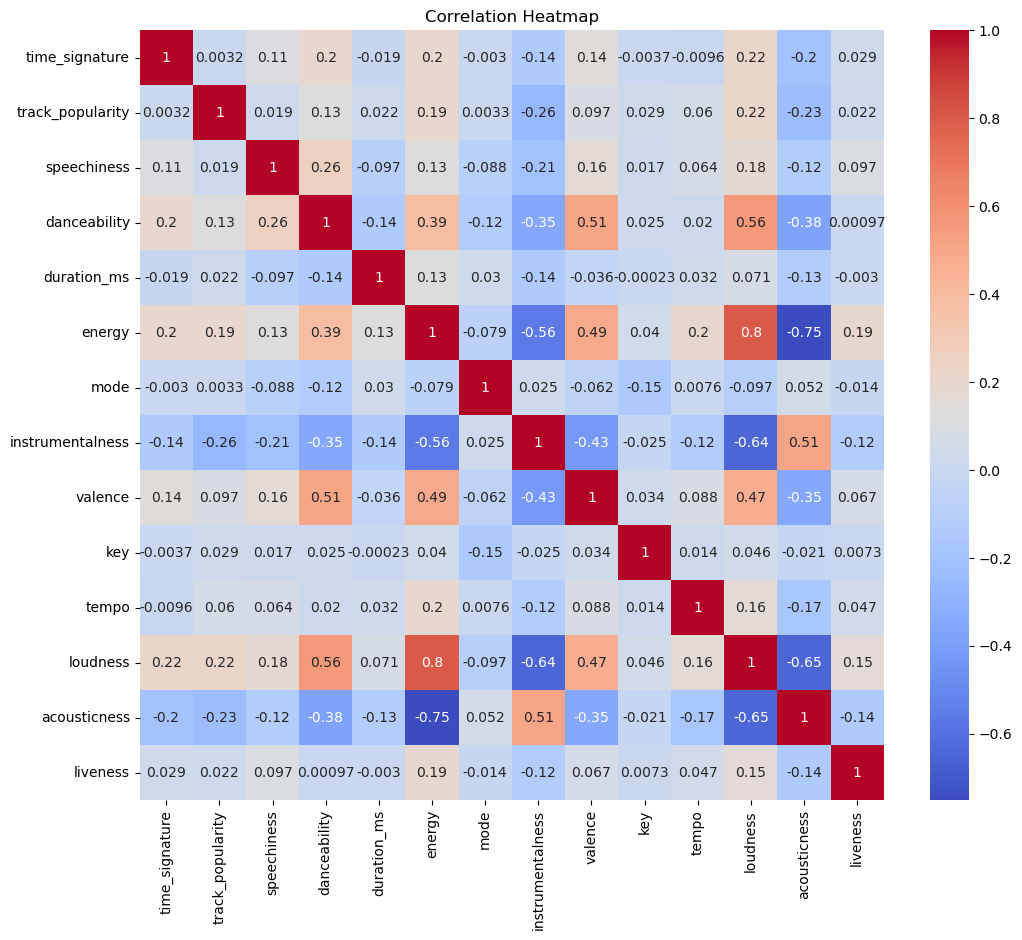

In [25]:
# Correlation heatmap for numeric features
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(combined_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Feature Distributions

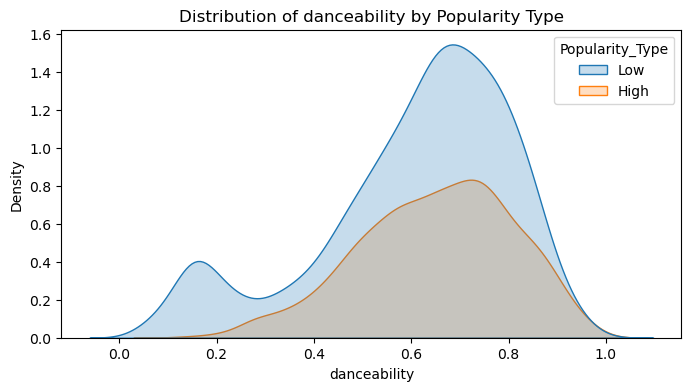

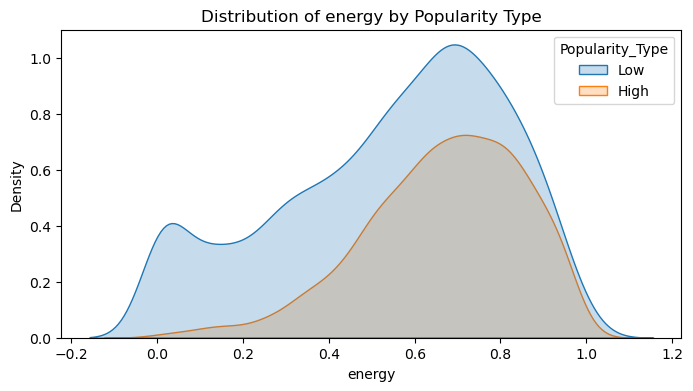

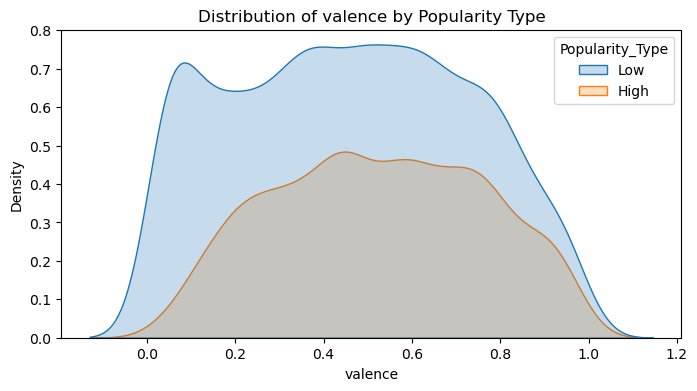

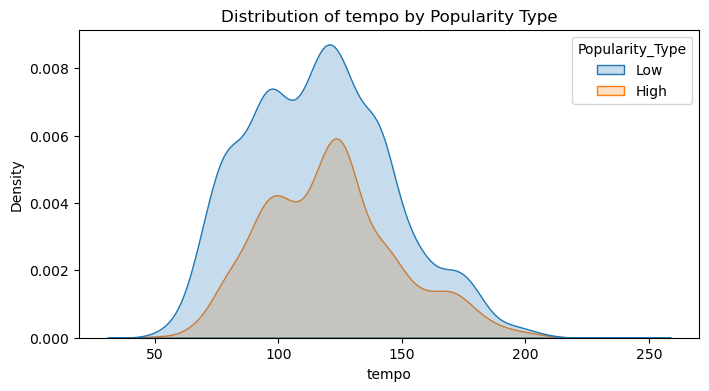

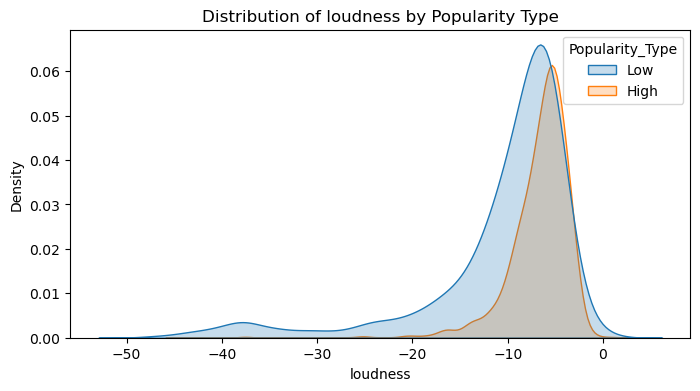

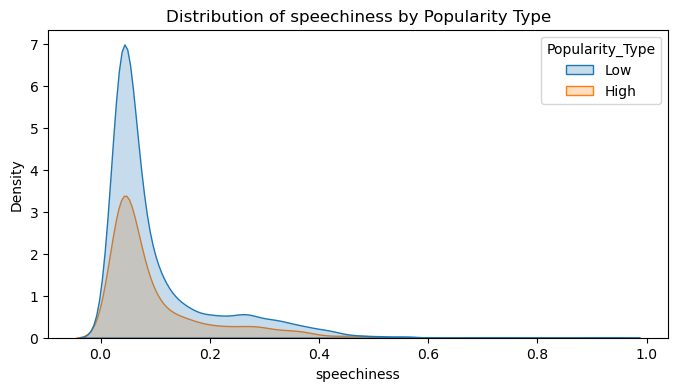

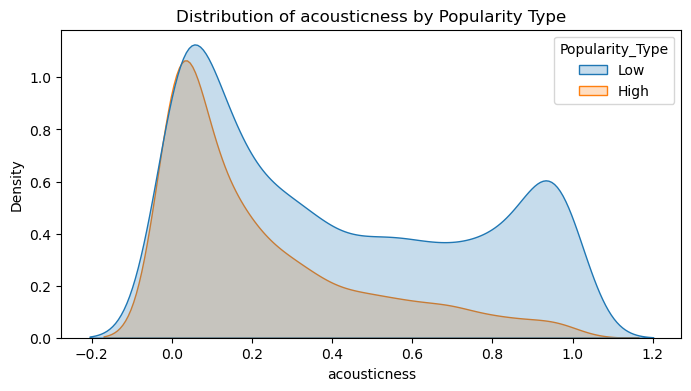

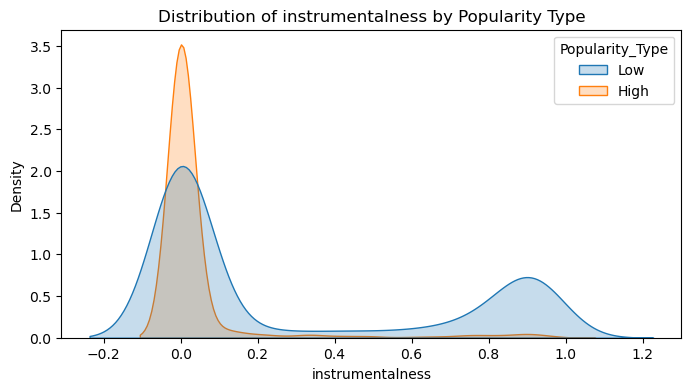

In [27]:
# Distribution of audio features by popularity type
audio_features = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness']
for feature in audio_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=combined_df, x=feature, hue='Popularity_Type', fill=True)
    plt.title(f'Distribution of {feature} by Popularity Type')
    plt.show()

#### Temporal Analysis

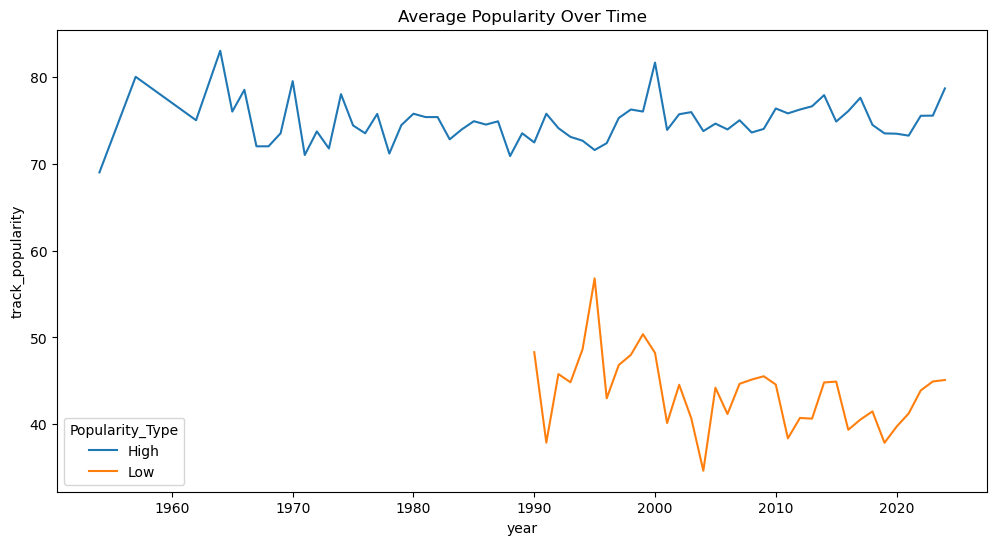

In [29]:
# Popularity trends over time
combined_df['year'] = combined_df['track_album_release_date'].dt.year
popularity_trend = combined_df.groupby(['year', 'Popularity_Type'])['track_popularity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=popularity_trend, x='year', y='track_popularity', hue='Popularity_Type')
plt.title('Average Popularity Over Time')
plt.show()


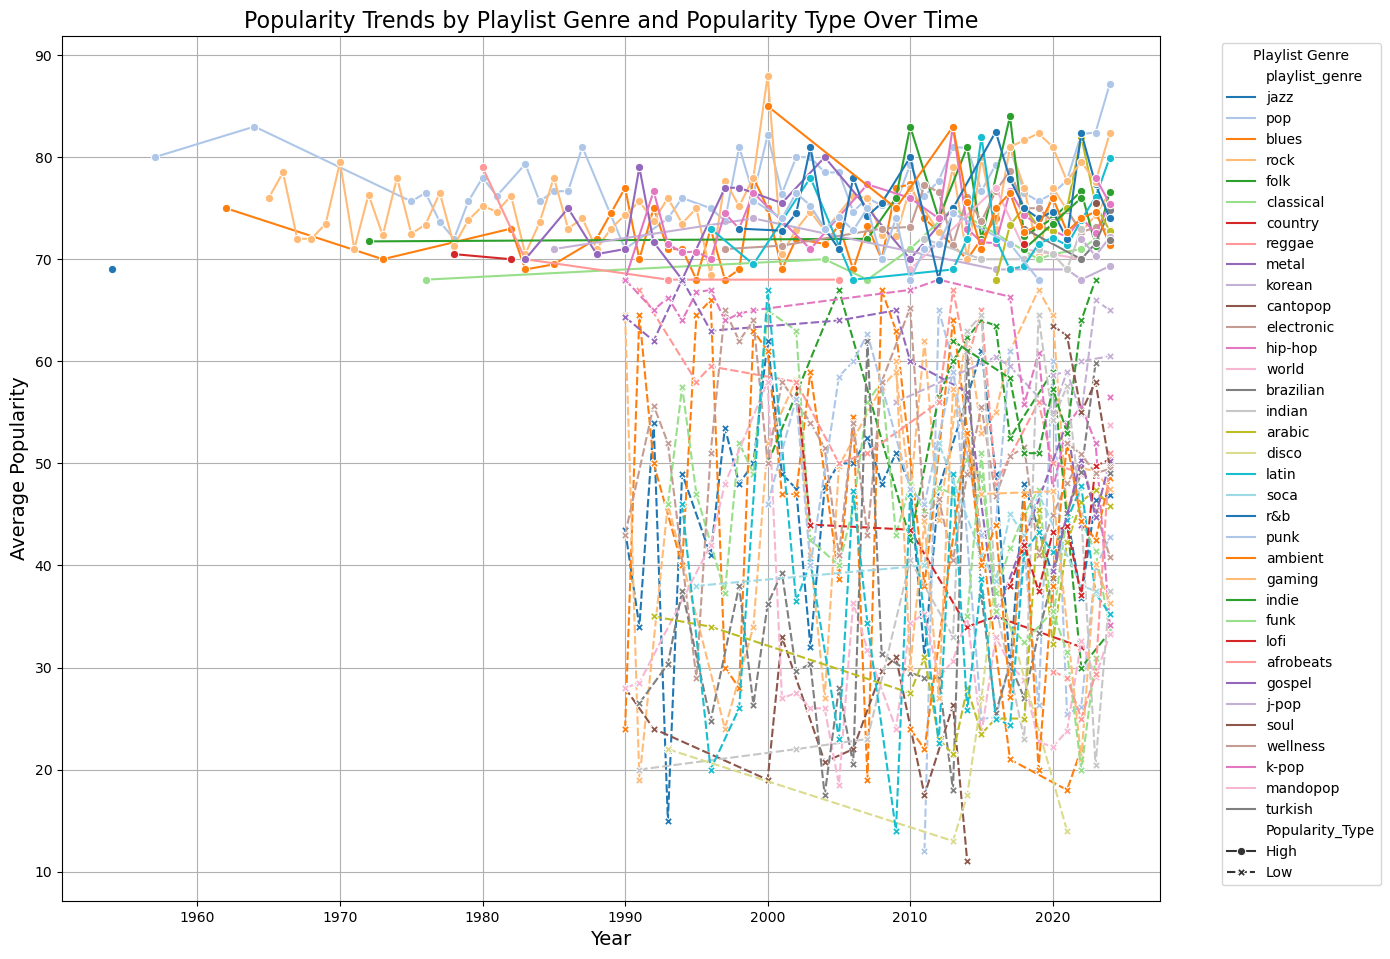

In [30]:
# Group data by year, playlist genre, and popularity type to calculate average popularity
popularity_trends = (
    combined_df.groupby(['year', 'playlist_genre', 'Popularity_Type'])['track_popularity']
    .mean()
    .reset_index()
)

# Plot popularity trends
plt.figure(figsize=(14, 10))
sns.lineplot(
    data=popularity_trends,
    x='year',
    y='track_popularity',
    hue='playlist_genre',
    style='Popularity_Type',
    markers=True,
    dashes=True,
    palette='tab20'
)

# Add title and labels
plt.title('Popularity Trends by Playlist Genre and Popularity Type Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
plt.legend(title='Playlist Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
# Group by year and genre, calculate average popularity
genre_popularity = (combined_df.groupby(['year', 'playlist_genre'])['track_popularity'].mean().reset_index())

# Find the most and least popular genre per year
most_popular_genres = genre_popularity.loc[genre_popularity.groupby('year')['track_popularity'].idxmax()]
least_popular_genres = genre_popularity.loc[genre_popularity.groupby('year')['track_popularity'].idxmin()]

# Merge results for better comparison
popularity_summary = pd.merge(
    most_popular_genres,
    least_popular_genres,
    on='year',
    suffixes=('_most', '_least')
)

# Display the result
print(popularity_summary)

    year playlist_genre_most  track_popularity_most playlist_genre_least  \
0   1954                jazz              69.000000                 jazz   
1   1957                 pop              80.000000                  pop   
2   1962               blues              75.000000                blues   
3   1964                 pop              83.000000                  pop   
4   1965                rock              76.000000                 rock   
..   ...                 ...                    ...                  ...   
59  2020                 r&b              74.666667                world   
60  2021              gaming              77.666667                disco   
61  2022                 r&b              82.400000                 funk   
62  2023               k-pop              78.000000               indian   
63  2024                 pop              77.103093                world   

    track_popularity_least  
0                69.000000  
1                80.000000  


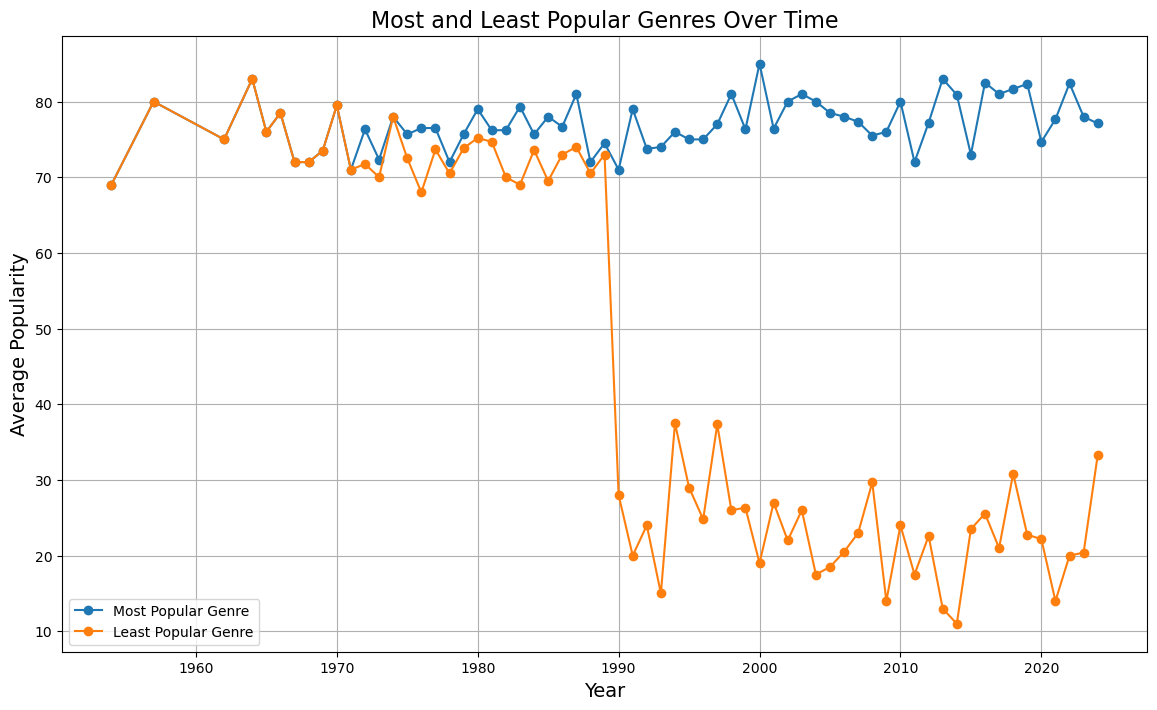

In [32]:
plt.figure(figsize=(14, 8))
plt.plot(popularity_summary['year'], popularity_summary['track_popularity_most'], label='Most Popular Genre', marker='o')
plt.plot(popularity_summary['year'], popularity_summary['track_popularity_least'], label='Least Popular Genre', marker='o')
plt.title('Most and Least Popular Genres Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

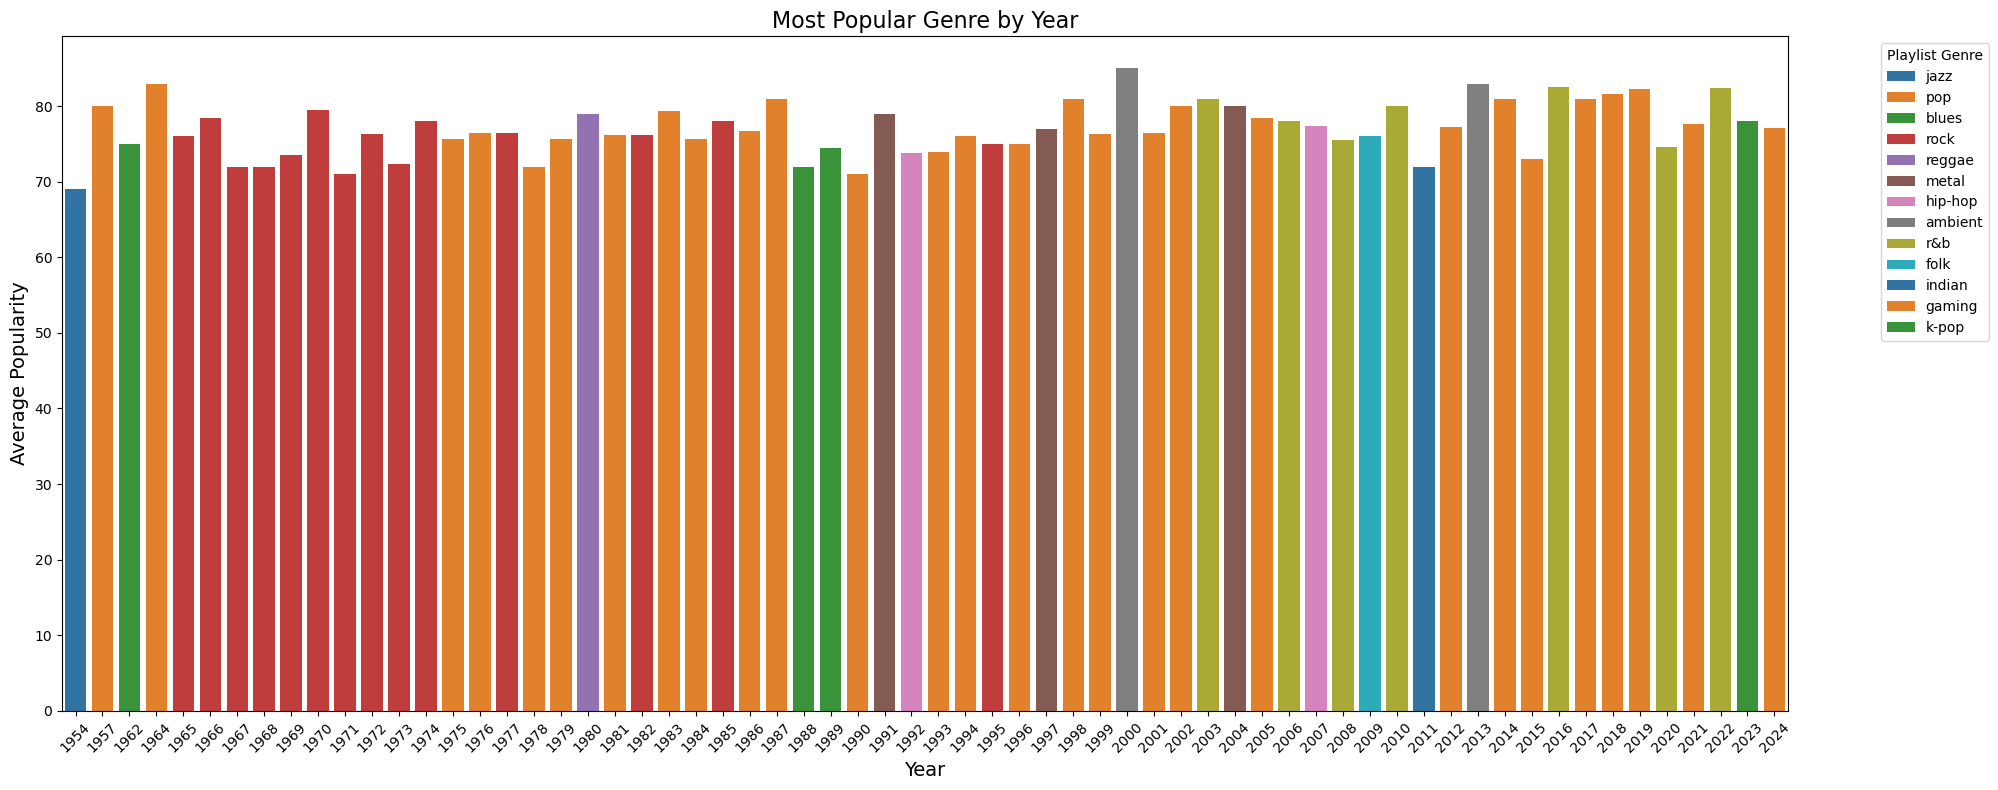

In [33]:
# Plot the most popular genres over time
plt.figure(figsize=(20, 8))
sns.barplot(
    data=most_popular_genres,
    x='year',
    y='track_popularity',
    hue='playlist_genre',
    dodge=False,
    palette='tab10'
)
plt.title('Most Popular Genre by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Playlist Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Number of Tracks Released Over Years

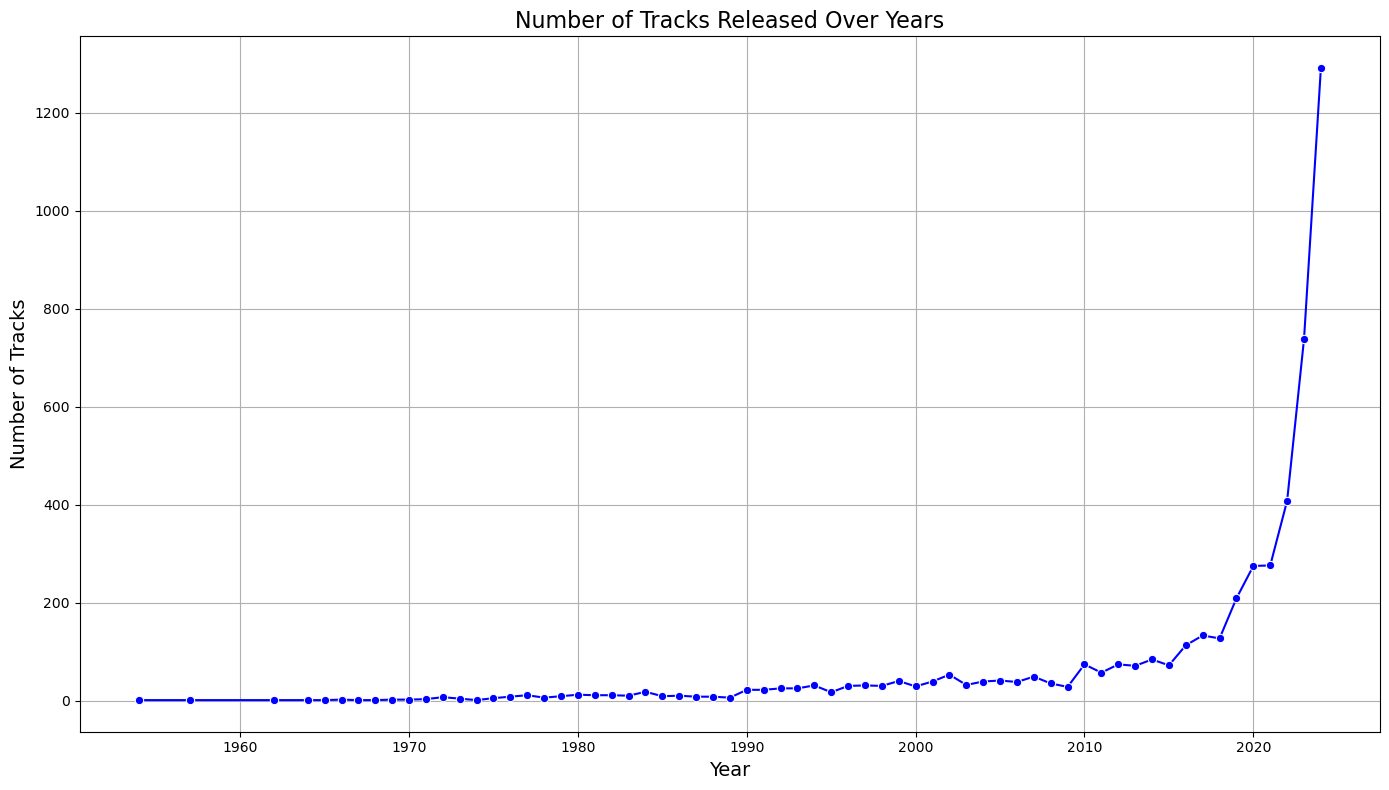

In [35]:
# Count the number of tracks released per year
tracks_per_year = combined_df.groupby('year').size().reset_index(name='track_count')

# Plot the number of tracks released over years
plt.figure(figsize=(14, 8))
sns.lineplot(data=tracks_per_year, x='year', y='track_count', marker='o', color='blue')
plt.title('Number of Tracks Released Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Boxplots of Audio Features

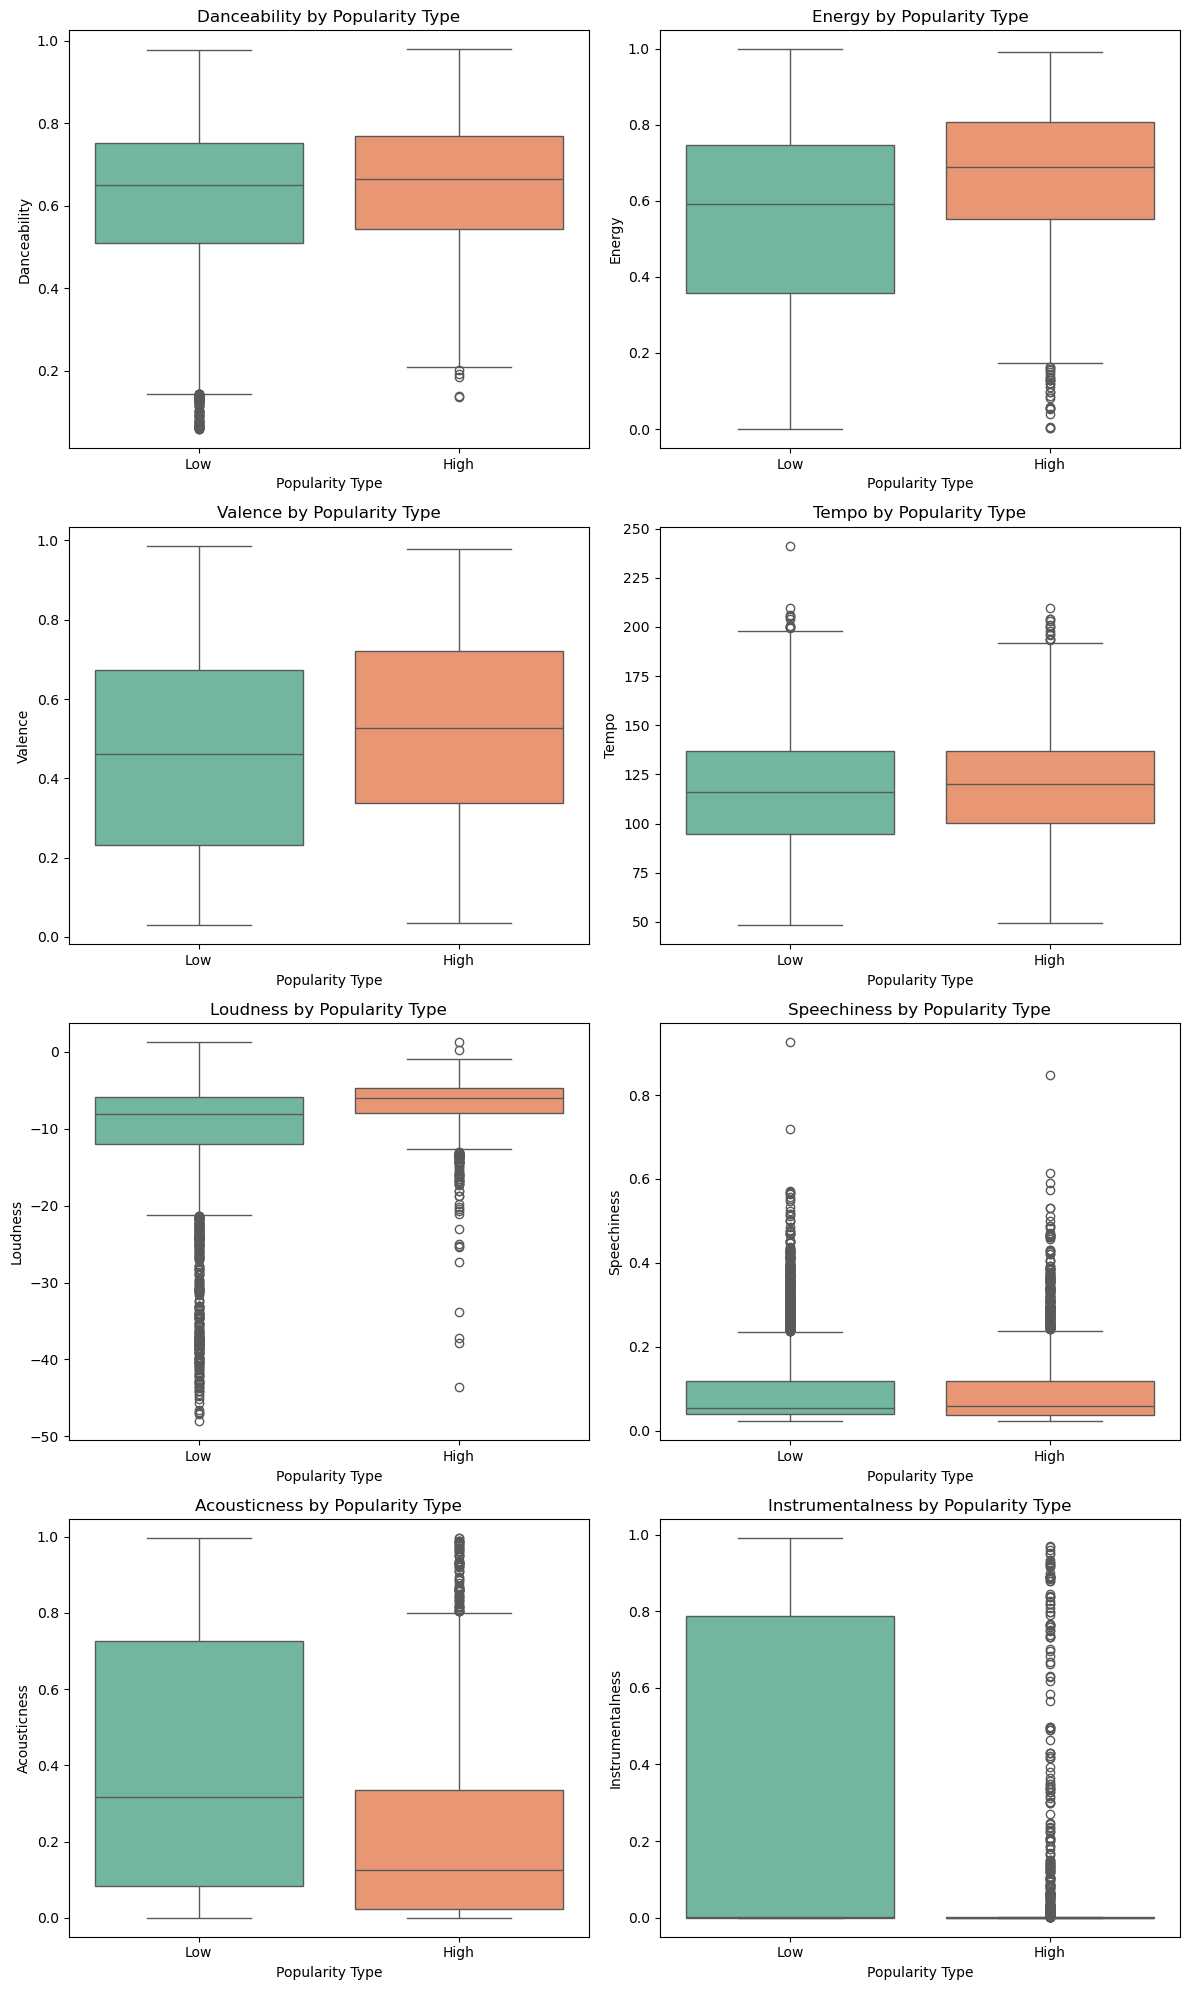

In [37]:
plt.figure(figsize=(12, 20))
for i, feature in enumerate(audio_features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=combined_df, x='Popularity_Type', y=feature, hue='Popularity_Type', palette='Set2')
    plt.title(f'{feature.capitalize()} by Popularity Type')
    plt.xlabel('Popularity Type')
    plt.ylabel(feature.capitalize())
    
plt.tight_layout()
plt.show()

#### Genre-Based Analysis

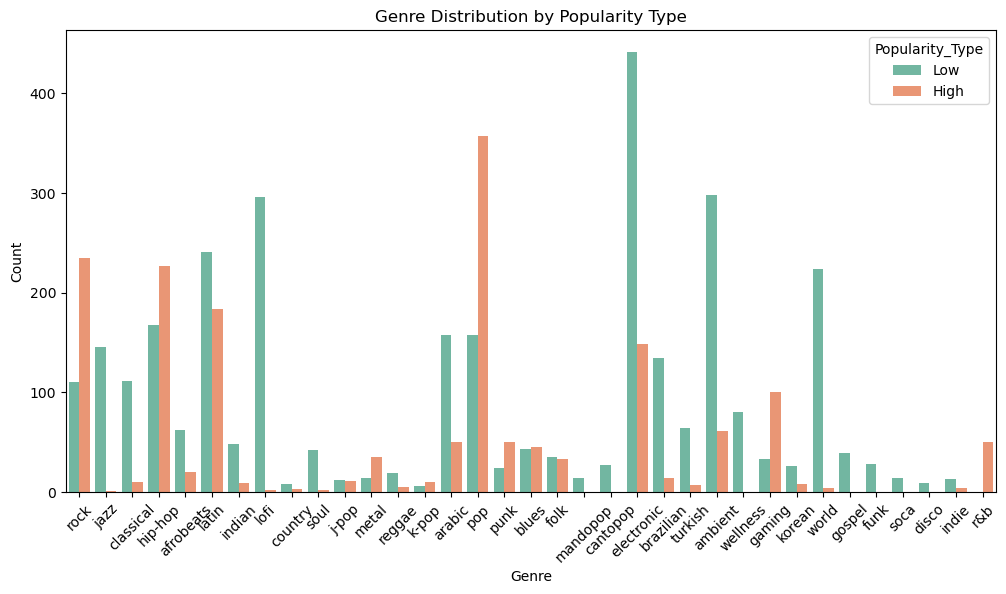

In [39]:
# Count plot for genres by popularity type
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x='playlist_genre', hue='Popularity_Type', palette='Set2')
plt.title('Genre Distribution by Popularity Type')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Scatter Plots for Feature Relationships

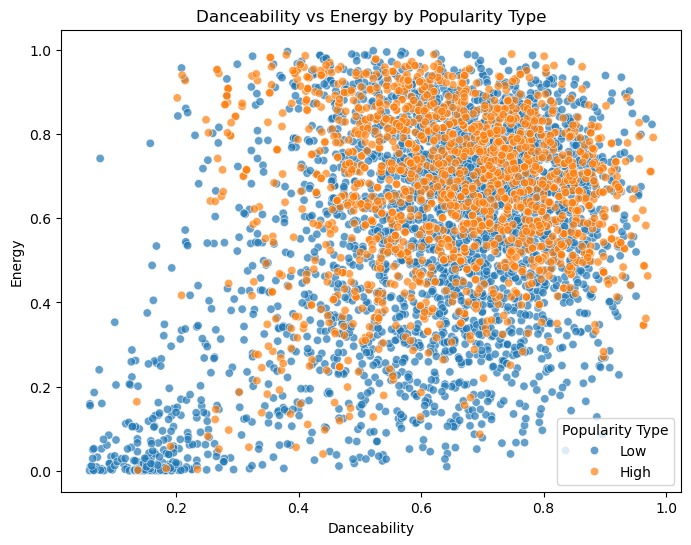

In [41]:
# Scatter plot for danceability vs energy
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df, x='danceability', y='energy', hue='Popularity_Type', alpha=0.7)
plt.title('Danceability vs Energy by Popularity Type')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Popularity Type')
plt.show()

#### Tempo Distribution Across Genres

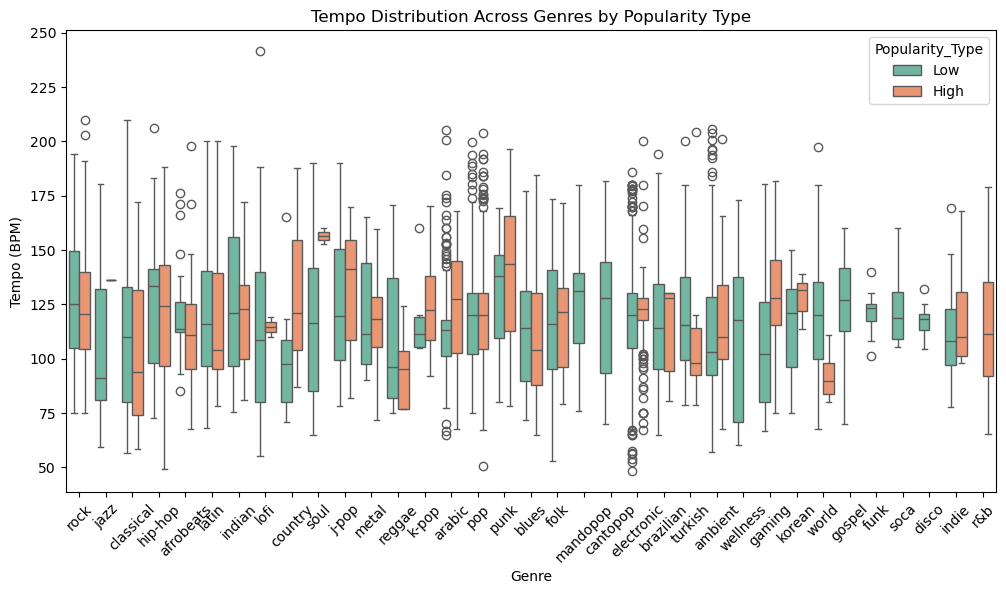

In [43]:
# Boxplot for tempo across genres
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='playlist_genre', y='tempo', hue='Popularity_Type', palette='Set2')
plt.title('Tempo Distribution Across Genres by Popularity Type')
plt.xlabel('Genre')
plt.ylabel('Tempo (BPM)')
plt.xticks(rotation=45)
plt.show()

#### Pair Plot for Numerical Features

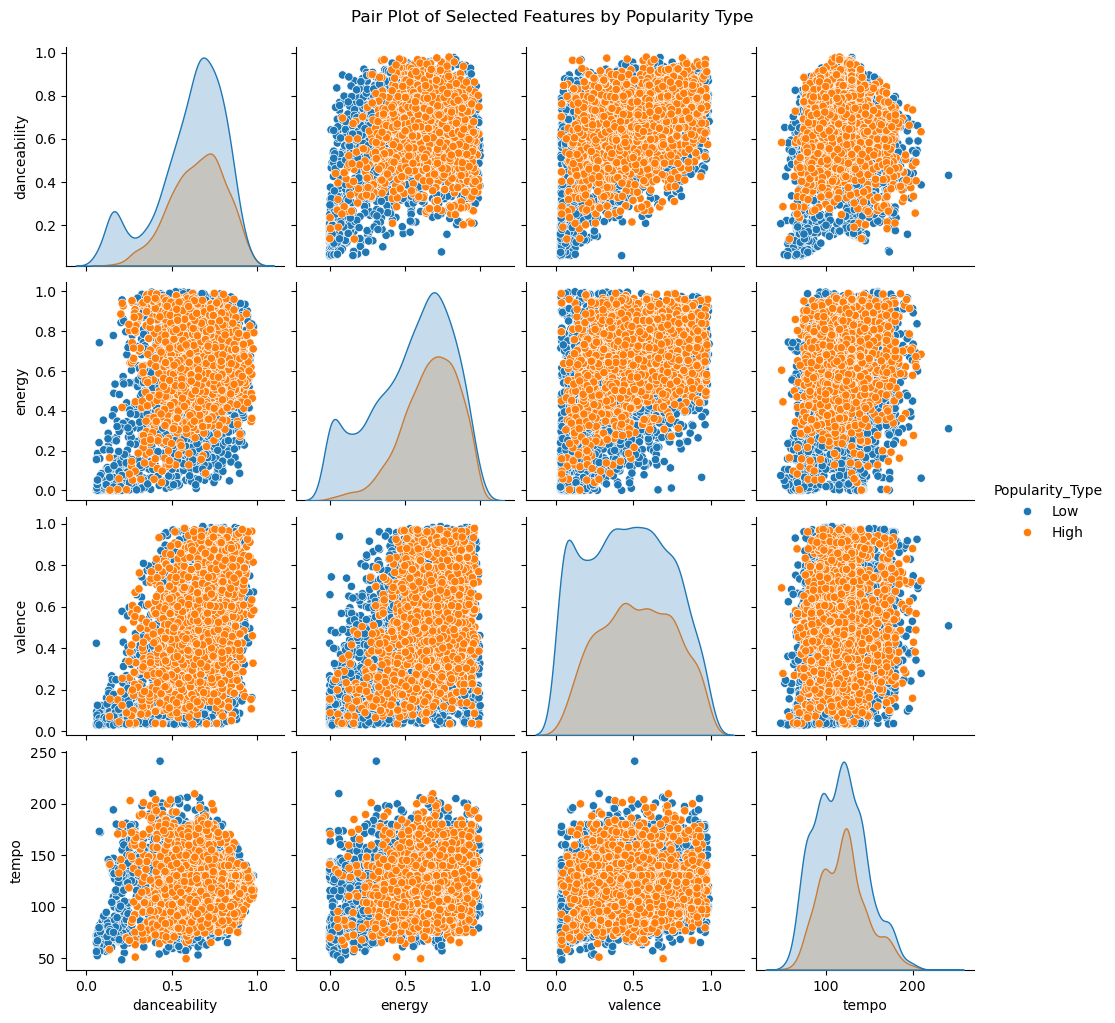

In [45]:
# Select a subset of numerical features
selected_features = ['danceability', 'energy', 'valence', 'tempo']
sns.pairplot(combined_df[selected_features + ['Popularity_Type']], hue='Popularity_Type', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features by Popularity Type', y=1.02)
plt.show()

#### Liveness vs Acousticness

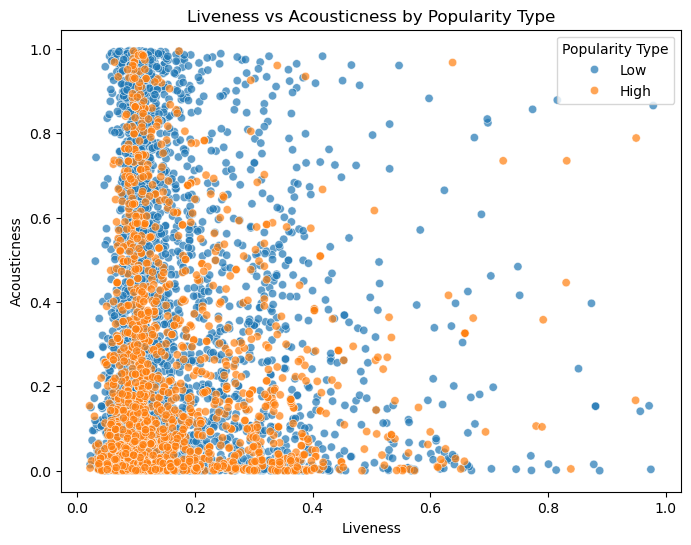

In [47]:
# Scatter plot for liveness vs acousticness
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df, x='liveness', y='acousticness', hue='Popularity_Type', alpha=0.7)
plt.title('Liveness vs Acousticness by Popularity Type')
plt.xlabel('Liveness')
plt.ylabel('Acousticness')
plt.legend(title='Popularity Type')
plt.show()

#### Duration Analysis

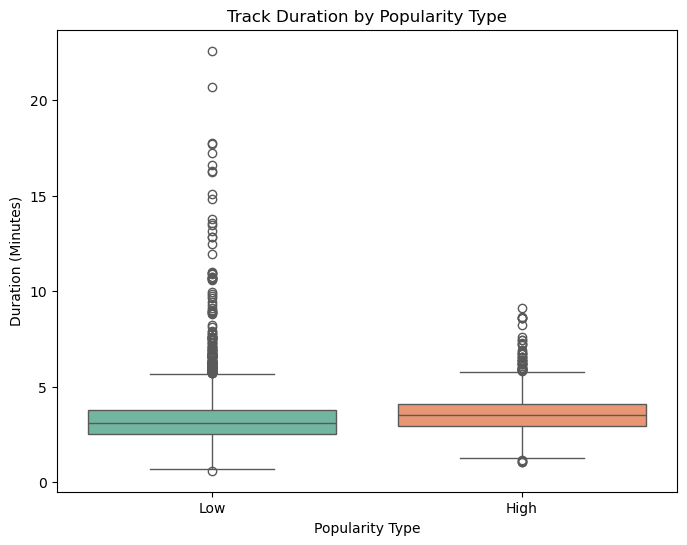

In [49]:
# Convert duration from milliseconds to minutes
combined_df['duration_min'] = combined_df['duration_ms'] / 60000

# Boxplot for duration in minutes by popularity type
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df, x='Popularity_Type', y='duration_min', hue='Popularity_Type', palette='Set2')
plt.title('Track Duration by Popularity Type')
plt.xlabel('Popularity Type')
plt.ylabel('Duration (Minutes)')
plt.show()


These visualizations will provide a deeper understanding of the dataset's structure and relationships between features.

In [51]:
combined_df.head()

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,valence,key,tempo,loudness,acousticness,liveness,track_album_name,Popularity_Type,year,duration_min
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...,Low,2005,2.300883
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection,Low,2015,4.026667
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition),Low,2016,5.490217
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella",Low,2007,3.086000
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter,Low,2000,3.428667


## Feature Engineering

Feature engineering is crucial for improving model performance by creating new features or transforming existing ones.

In [54]:
# Extract year from the release date
combined_df['release_year'] = combined_df['track_album_release_date'].dt.year

# Create a new feature: Song Age (current year - release year)
current_year = 2025  # Using the current year from the given date
combined_df['song_age'] = current_year - combined_df['release_year']

# Create interaction features
combined_df['energy_danceability_ratio'] = combined_df['energy'] / (combined_df['danceability'] + 1e-5)
combined_df['valence_energy_product'] = combined_df['valence'] * combined_df['energy']

# Create a binary feature for whether the track is from the 2000s or earlier
combined_df['is_2000s_or_earlier'] = (combined_df['release_year'] <= 2000).astype(int)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                      'instrumentalness', 'liveness', 'valence', 'tempo', 'song_age']
combined_df[numerical_features] = scaler.fit_transform(combined_df[numerical_features])

# Drop rows with missing values after feature engineering
combined_df = combined_df.dropna()

# Save the engineered dataset for modeling
combined_df.to_csv('engineered_spotify_data.csv', index=False)

## Modeling and Machine Learning

Now, let's proceed with modeling and machine learning using the engineered features:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       642
           1       0.98      0.97      0.97       324

    accuracy                           0.98       966
   macro avg       0.98      0.98      0.98       966
weighted avg       0.98      0.98      0.98       966



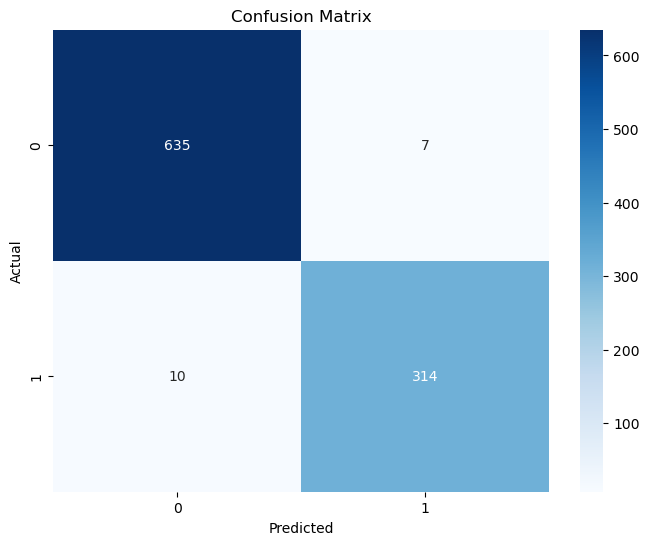

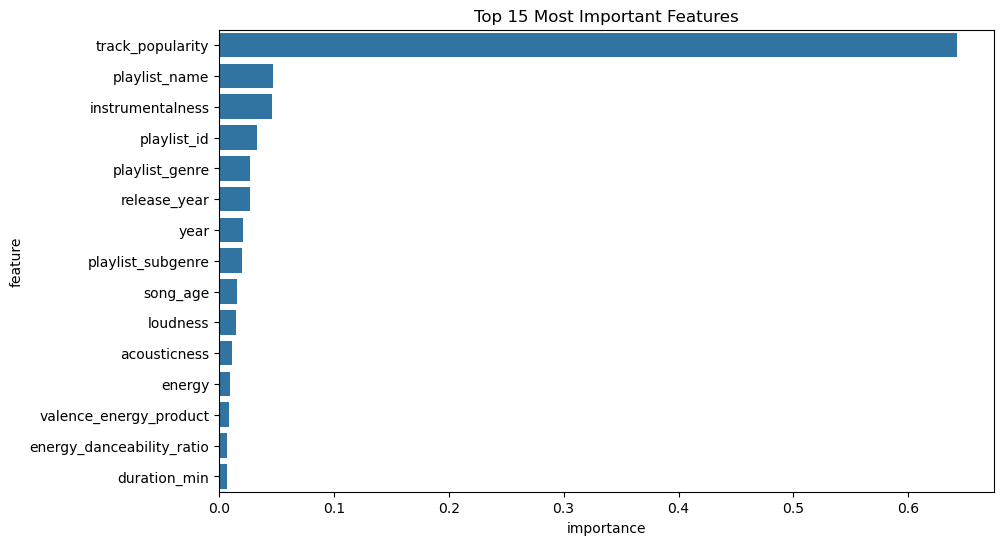

Cross-validation scores: [0.98136646 0.97619048 0.99275362 0.98343685 0.97512953]
Mean CV score: 0.9818


In [57]:
from sklearn.model_selection import train_test_split, cross_val_score

# Load the engineered dataset
df = pd.read_csv('engineered_spotify_data.csv')

# Convert the target variable ('Popularity_Type') to numeric
df['Popularity_Type'] = df['Popularity_Type'].map({'High': 1, 'Low': 0})

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Encode categorical variables
le = LabelEncoder()
for col in non_numeric_columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Prepare features and target variable
X = df.drop(['Popularity_Type', 'track_album_release_date'], axis=1)
y = df['Popularity_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.show()

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")



Based on the classification report, this Random Forest model for predicting track popularity on Spotify demonstrates excellent performance.

In conclusion, this Random Forest model demonstrates high accuracy in predicting Spotify track popularity based on audio features and metadata. Its balanced performance across classes makes it a reliable tool for understanding and predicting music popularity trends on the platform. However, as with any model, it should be used in conjunction with domain expertise and consideration of external factors not captured in the dataset.